In [2]:
import random
import numpy as np
from timeit import default_timer as timer
import plotnine as p9
import pandas as pd

In [3]:
class Tree:
    def __init__(self,valueInput=None):
        self.value = valueInput
        self.left = None
        self.right = None
    
    def add(self,valueInput):
        if self.value is None:
            self.value = valueInput
        else:
            if self.value <= valueInput:
                if self.right is None:
                    self.right=Tree(valueInput)
                else:
                    self.right.add(valueInput)
            else:
                if self.left is None:
                    self.left=Tree(valueInput)
                else:
                    self.left.add(valueInput)
        return Tree
    def __contains__(self, valueInput):
        if self.value == valueInput:
                return True
        elif self.left and valueInput < self.value:
            return valueInput in self.left
        elif self.right and valueInput > self.value:
            return valueInput in self.right
        else:
            return False

In [4]:
my_tree = Tree()

In [5]:
for item in [55, 62, 37, 49, 71, 14, 17]:
    my_tree.add(item)

In [6]:
55 in my_tree 

True

In [7]:
42 in my_tree

False

In [8]:
rand_list=[]
time_add_list=[]
time_list=[]
for i in np.logspace(0,5).astype(int):
    tree=Tree()
    rand_list.append(random.randint(0,i))
    start_add=timer()
    for items in rand_list:
        tree.add(items)
    end_add=timer()
    time_add=end_add-start_add
    time_add_list.append(time_add)
    start = timer()
    for num_check in rand_list:
        items in tree
    end = timer()
    time=end-start
    time_list.append(time)

In [9]:
len(rand_list)

50

In [10]:
len(time_list)

50

In [11]:
plot_size_in=(p9.ggplot(pd.DataFrame({'run_time':time_list,'size':rand_list}),p9.aes(x='size',y='run_time'))
          +p9.geom_line()
          +p9.geom_abline(intercept=-5.5,slope=1)
          +p9.scale_x_log10()
          +p9.scale_y_log10(limits = [1e-6,1e4])
          )

/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


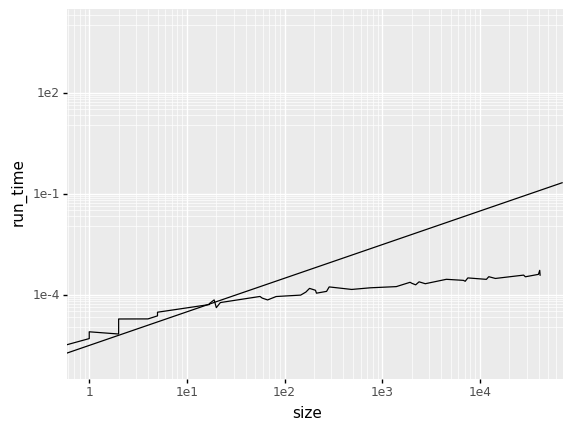

<ggplot: (8771174860867)>

In [12]:
plot_size_in

In [13]:
plot_size_setup=(p9.ggplot(pd.DataFrame({'run_time':time_add_list,'size':rand_list}),p9.aes(x='size',y='run_time'))
          +p9.geom_line()
          +p9.stat_function(fun=lambda x: x**2-10)
          +p9.geom_abline(intercept=-10,slope=1)
          +p9.scale_x_log10(limits = [1e0,1e5])
          +p9.scale_y_log10(limits = [1e-6,1e7])
          )

/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/Users/amygdk/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 95 rows containing missing values.


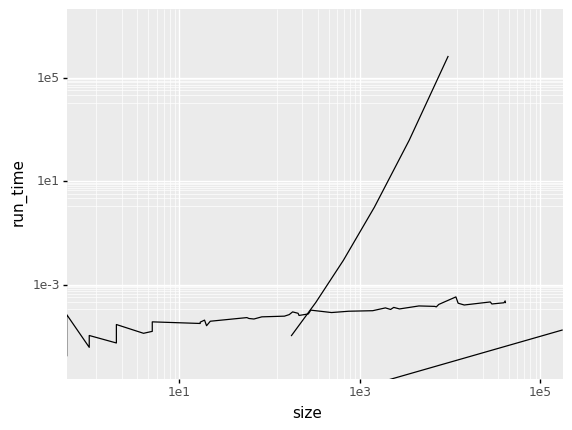

<ggplot: (8771175143063)>

In [14]:
plot_size_setup